In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Courses\Data-Science_Tech\INeuron_Courses\MACHING_LEARNING_LIVE-CLASS\PROJECT\ML_CODE\ML_Live_Class\data\hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [3]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


<AxesSubplot:xlabel='test_result', ylabel='count'>

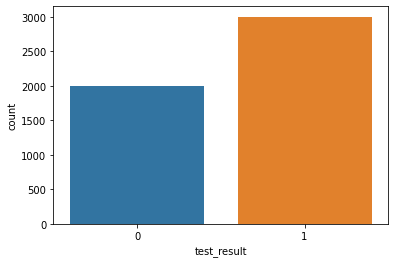

In [5]:
sns.countplot(data = df, x=df['test_result'])

<AxesSubplot:xlabel='test_result', ylabel='age'>

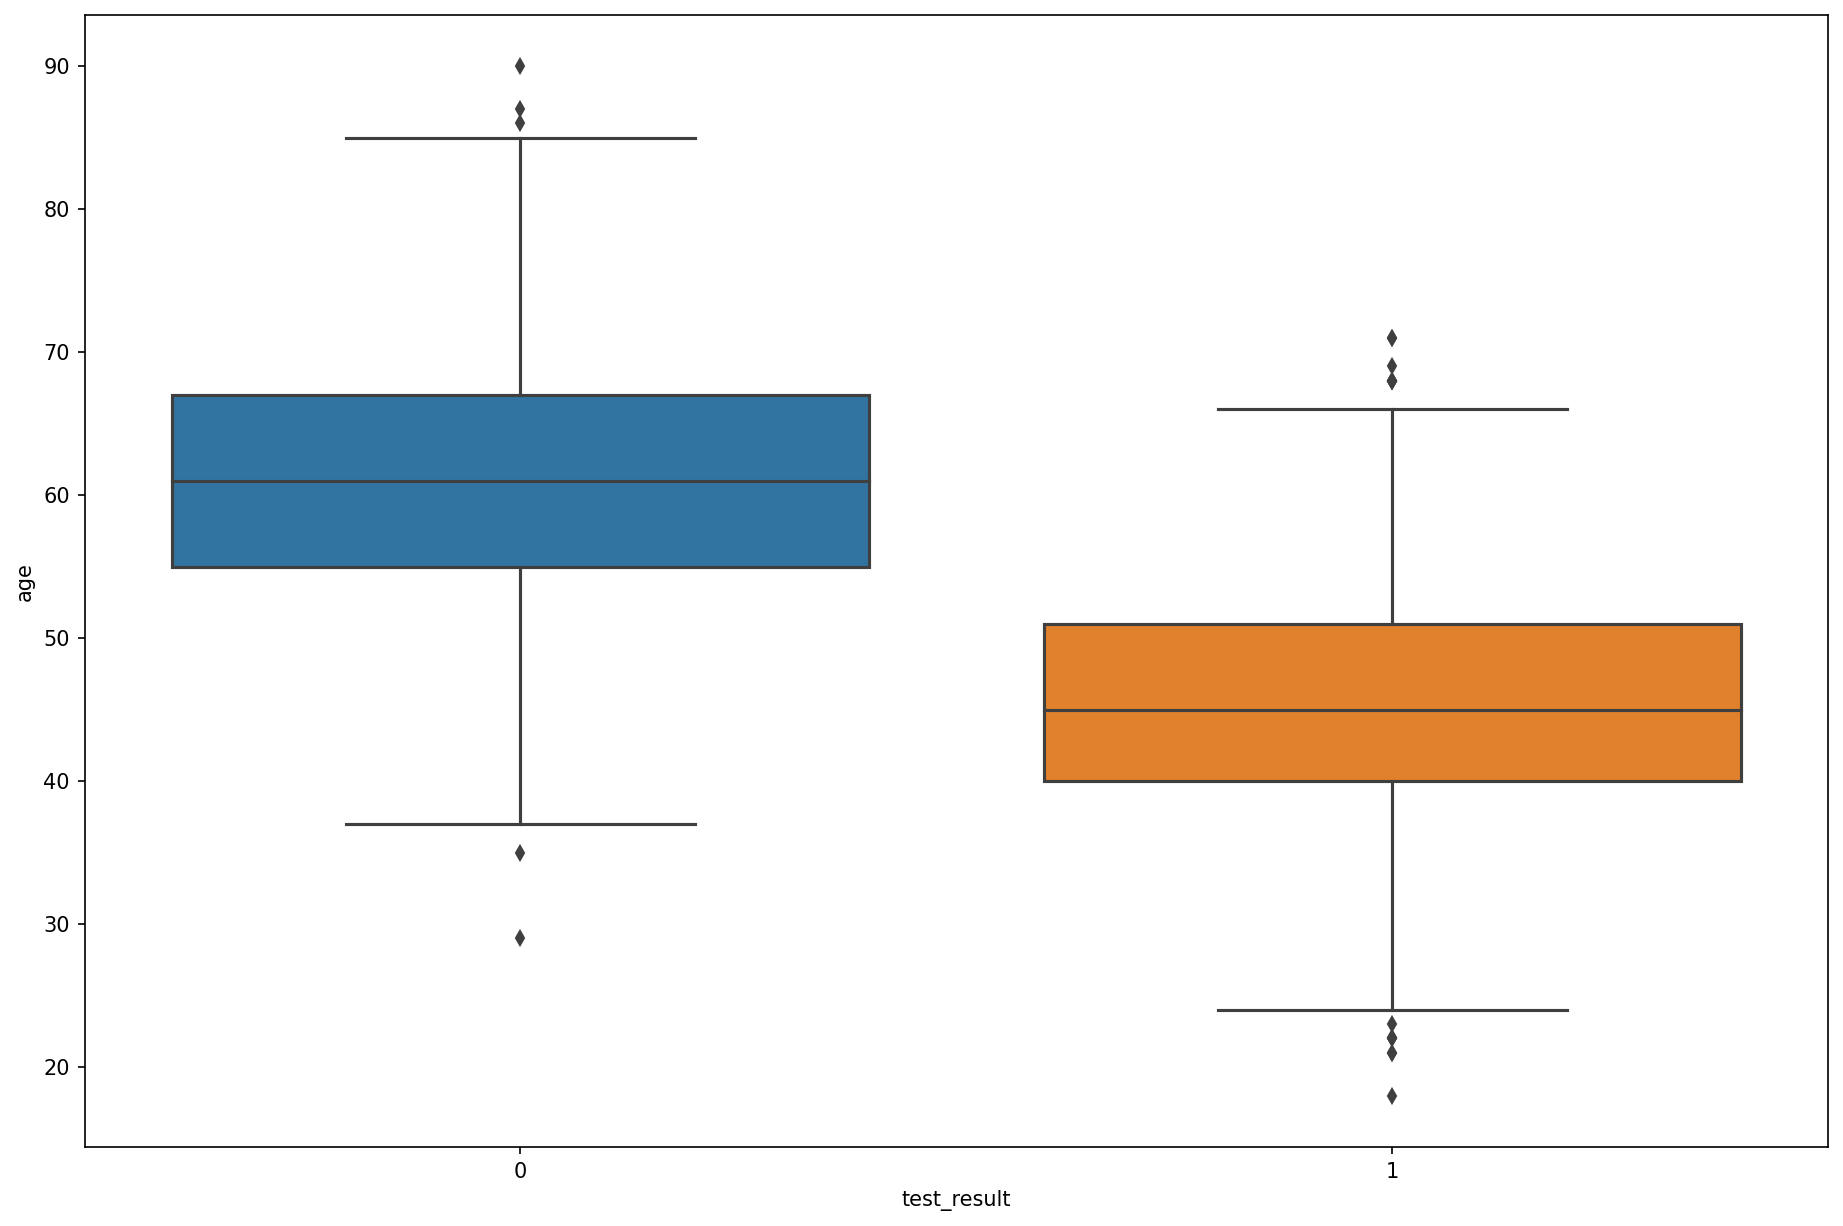

In [6]:
plt.figure(figsize=(15,10),dpi=150)
sns.boxplot(x='test_result',y= 'age',data = df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

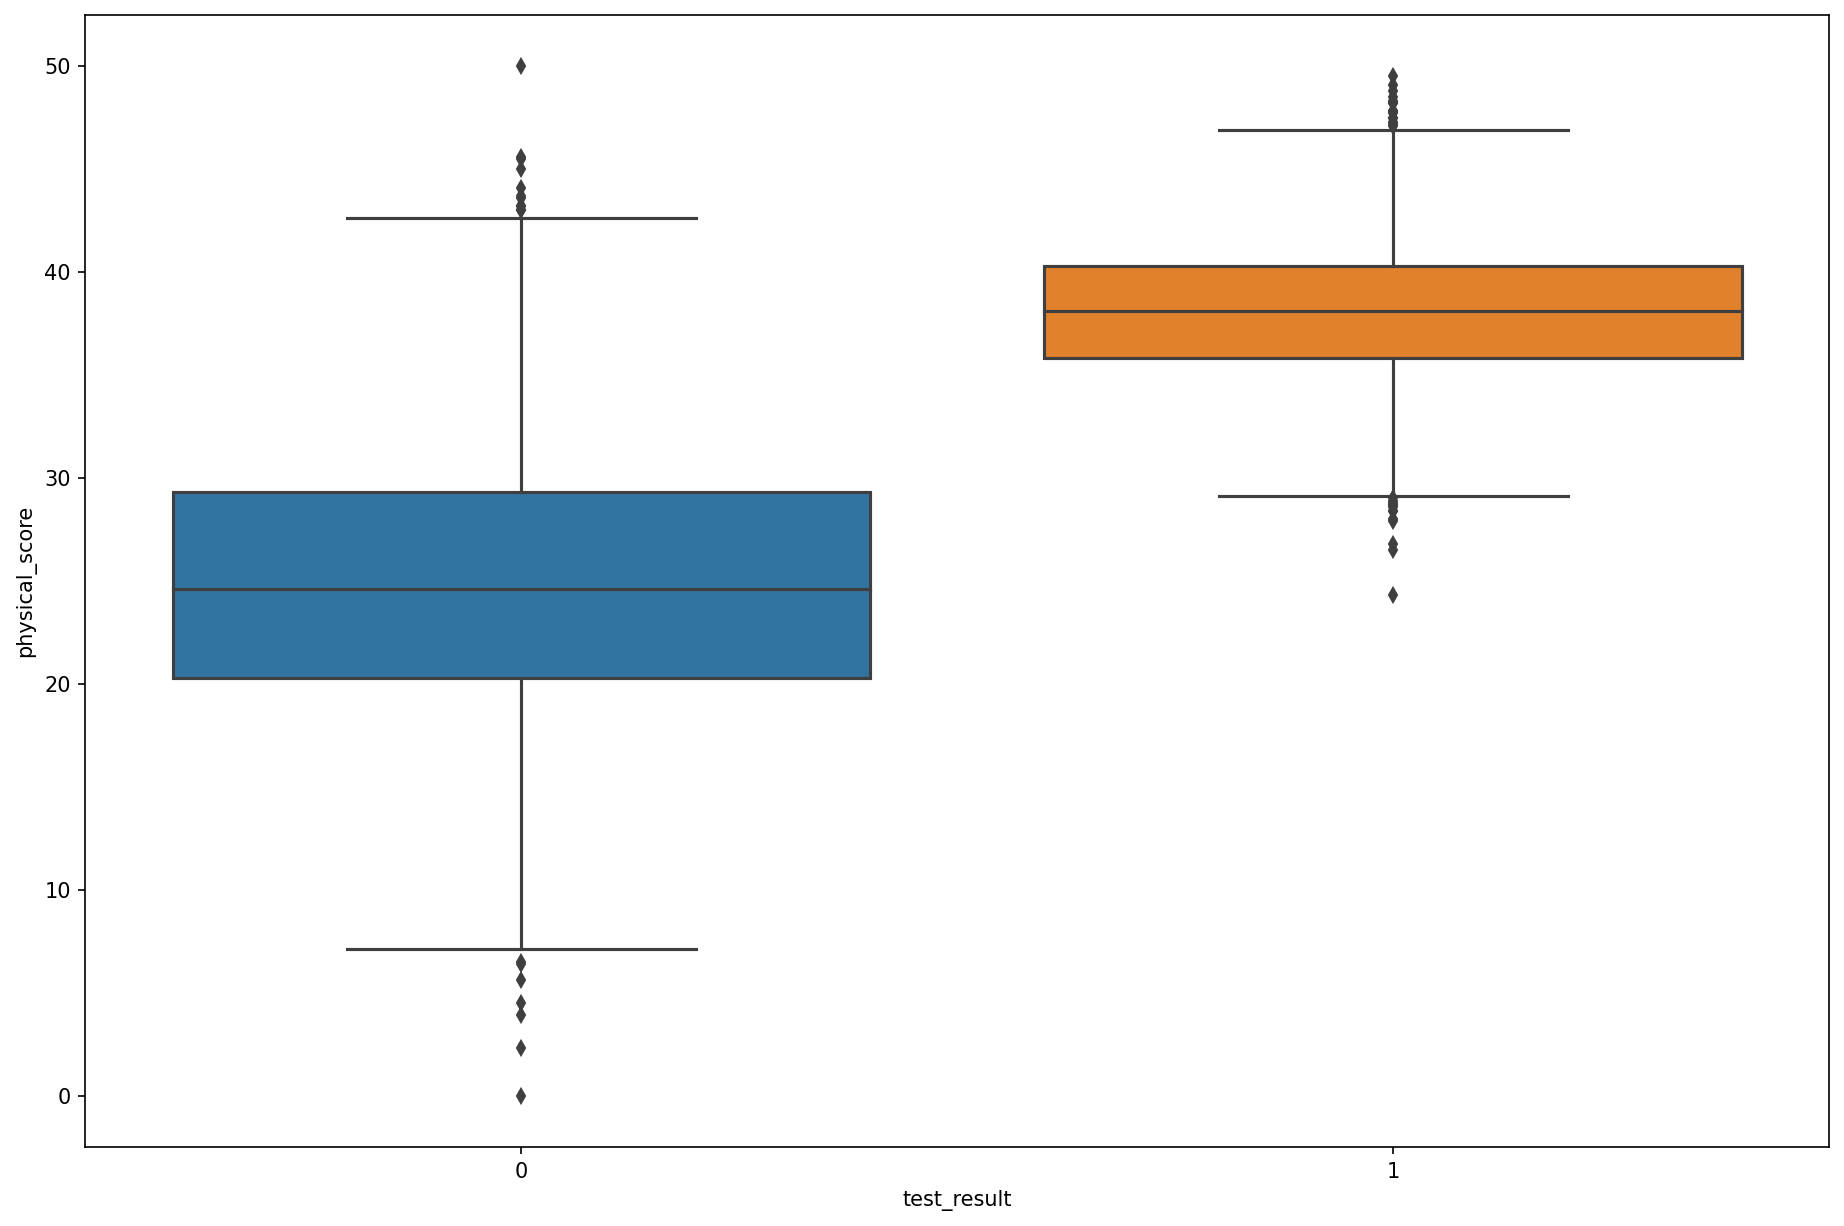

In [7]:
plt.figure(figsize=(15,10),dpi=150)
sns.boxplot(x='test_result',y= 'physical_score',data = df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

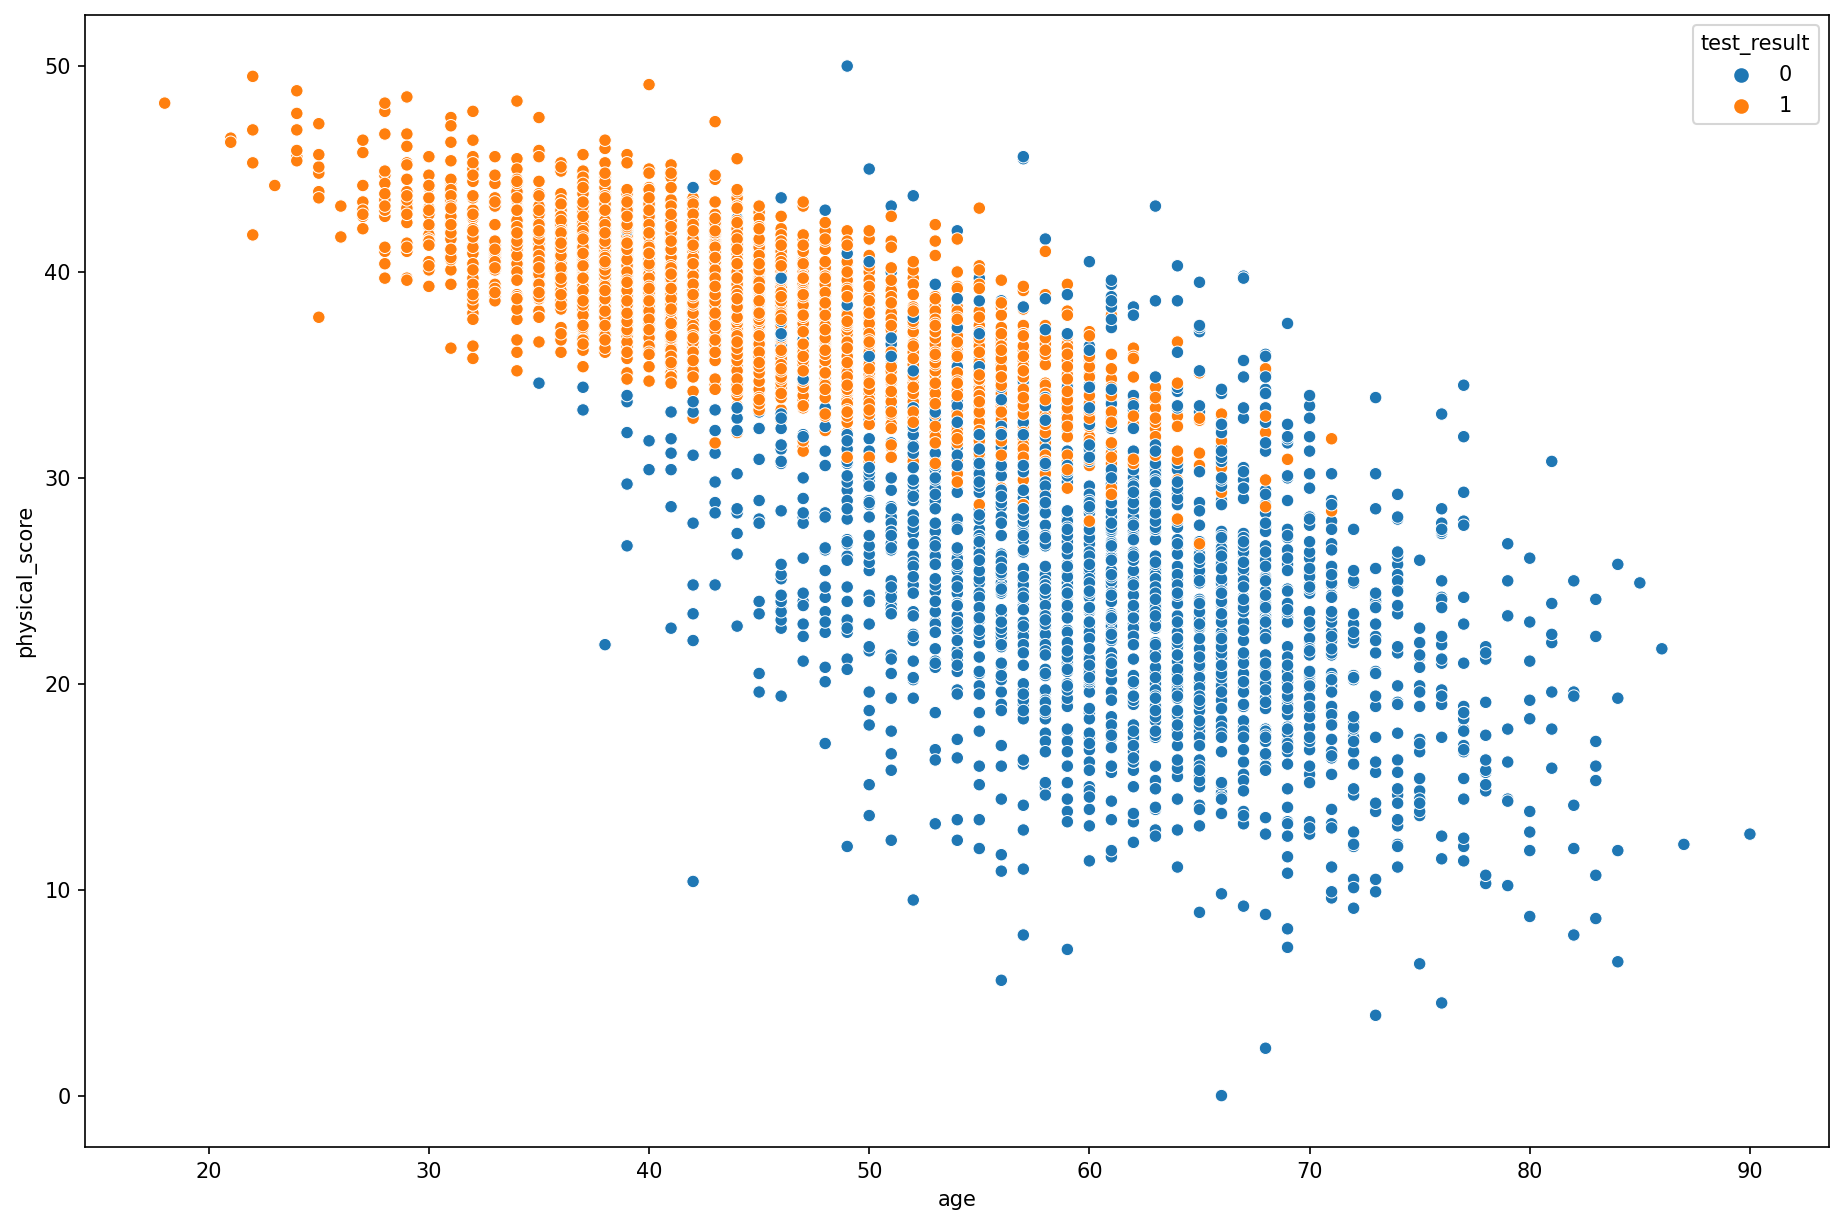

In [8]:
plt.figure(figsize=(15,10),dpi=150)
sns.scatterplot(x='age',y='physical_score',data = df,hue='test_result',alpha=1)

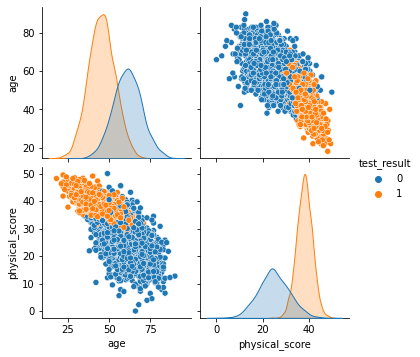

In [9]:
#plt.figure(figsize=(15,10),dpi=150)
sns.pairplot(data = df,hue='test_result')

<AxesSubplot:>

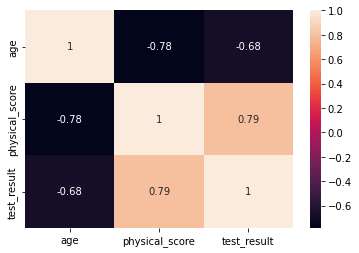

In [10]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

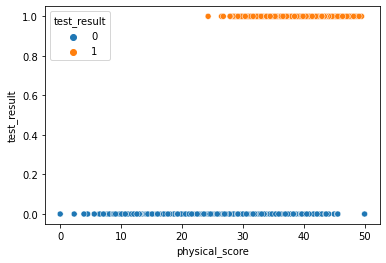

In [11]:
sns.scatterplot(y='test_result',x='physical_score',data = df,hue='test_result') #Not a good way to visualize for classification

In [12]:
#3D Visulization 
#fig = plt.figure
#ax = plt.subplot()

In [13]:
#Training

In [14]:
#Separating x,y

X = df.drop('test_result',axis = 1)
y = df['test_result']

In [15]:
# Train Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.1, random_state=101,shuffle=True)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_test_scaled = scaler.fit_transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [22]:
model.coef_

array([[-0.94953524,  3.45991194]])

In [27]:
y_pred = model.predict(X_test_scaled)

In [24]:
#y_pred = model.predict_proba(X_test_scaled)
#y_pred

array([[3.09267151e-02, 9.69073285e-01],
       [3.46183276e-02, 9.65381672e-01],
       [9.89850652e-01, 1.01493479e-02],
       [2.63867805e-03, 9.97361322e-01],
       [9.76798467e-01, 2.32015329e-02],
       [9.90296858e-01, 9.70314158e-03],
       [9.17503241e-02, 9.08249676e-01],
       [2.23885958e-02, 9.77611404e-01],
       [9.97136737e-01, 2.86326280e-03],
       [4.21538922e-02, 9.57846108e-01],
       [1.02178637e-01, 8.97821363e-01],
       [1.32310276e-02, 9.86768972e-01],
       [9.53021603e-03, 9.90469784e-01],
       [9.41001469e-01, 5.89985310e-02],
       [1.73909902e-04, 9.99826090e-01],
       [8.23877636e-02, 9.17612236e-01],
       [9.89664721e-01, 1.03352792e-02],
       [3.85833550e-03, 9.96141665e-01],
       [7.99114453e-04, 9.99200886e-01],
       [9.96617310e-01, 3.38268988e-03],
       [8.93305492e-01, 1.06694508e-01],
       [1.57519985e-01, 8.42480015e-01],
       [5.84191779e-01, 4.15808221e-01],
       [4.37511514e-02, 9.56248849e-01],
       [4.394643

### Classification Metrics

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
accuracy_score(y_test,y_pred)

0.924

In [29]:
confusion_matrix(y_test,y_pred)

array([[173,  20],
       [ 18, 289]], dtype=int64)

In [30]:
from sklearn.metrics import plot_confusion_matrix


C:\Users\SREEKANTH\.conda\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


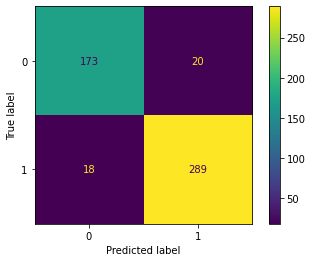

In [33]:
plot_confusion_matrix(model, X_test_scaled,y_test)#,normalize='all')

In [35]:
class_report = classification_report(y_test,y_pred)
print (class_report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       193
           1       0.94      0.94      0.94       307

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [36]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

C:\Users\SREEKANTH\.conda\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


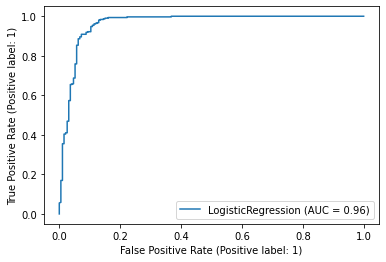

In [37]:
plot_roc_curve(model,X_test_scaled,y_test)

C:\Users\SREEKANTH\.conda\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


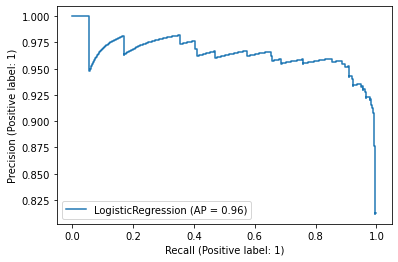

In [38]:
plot_precision_recall_curve(model,X_test_scaled,y_test)